In [ ]:
# Libraries import karna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random

print("Libraries successfully imported ✅")


# 📊 Sales Data Analysis Report
### Internship Project – Brainwave Matrix Solutions

**Prepared by:** Momina Saqlain  
**Date:** 28 September 2025  

---

## 🔎 Project Summary
This project performs a **Sales Data Analysis** for a commercial store.  

**Objectives:**  
- Analyze monthly sales trends 📆  
- Identify top-selling products 🏆  
- Evaluate profitability 💰  
- Provide business recommendations ✅  

---


## 📂 Dataset Overview
The dataset contains sales transactions with the following fields:  

- **Date** – order date  
- **Product** – product name  
- **Category** – product category  
- **Sales** – total sales value  
- **Quantity** – number of units sold  
- **Profit** – profit earned  

---


# Dummy sales dataset generator

np.random.seed(42)
n_orders = 500   # 500 fake orders bana rahe hain
start_date = datetime(2024, 1, 1)
dates = [start_date + timedelta(days=int(x)) for x in np.random.uniform(0, 365, n_orders)]

products = [
    ("P001","Wireless Mouse","Accessories",15.99,6.5),
    ("P002","Mechanical Keyboard","Accessories",49.99,25.0),
    ("P003","27in Monitor","Electronics",179.99,120.0),
    ("P004","USB-C Cable","Accessories",5.99,1.2),
    ("P005","Laptop 14in","Computers",699.99,520.0),
]

rows = []
for i in range(n_orders):
    pid, pname, category, price, cost = random.choice(products)
    qty = np.random.randint(1, 5)
    sales = price * qty
    profit = (price - cost) * qty
    rows.append({
        "OrderID": f"ORD{i+1:04d}",
        "Date": dates[i].date(),
        "ProductID": pid,
        "ProductName": pname,
        "Category": category,
        "UnitPrice": price,
        "Quantity": qty,
        "Sales": sales,
        "Profit": profit
    })

df = pd.DataFrame(rows)
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)

df.head()


## 🧹 Data Cleaning
Steps performed:  
- Removed duplicates  
- Ensured correct data types  
- Formatted the Date column  
- Verified numeric fields for Sales & Profit  

---


In [15]:
# Example cleaning
df = df.drop_duplicates(subset=['OrderID'])
df['Quantity'] = df['Quantity'].astype(int)
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce').fillna(0)
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce').fillna(0)

print("✅ Data cleaned successfully")


✅ Data cleaned successfully


## 🔎 Exploratory Data Analysis (EDA)
Let's explore the dataset to understand its structure, summary statistics, and sample records.


In [3]:
# Dataset ka size
print("Rows, Columns:", df.shape)

# Columns ka summary
print("\nInfo:")
print(df.info())

# Descriptive statistics (numbers ka summary)
print("\nStatistics:")
print(df.describe())

# Pehli 10 rows
df.head(10)


Rows, Columns: (500, 10)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      500 non-null    object        
 1   Date         500 non-null    datetime64[ns]
 2   ProductID    500 non-null    object        
 3   ProductName  500 non-null    object        
 4   Category     500 non-null    object        
 5   UnitPrice    500 non-null    float64       
 6   Quantity     500 non-null    int64         
 7   Sales        500 non-null    float64       
 8   Profit       500 non-null    float64       
 9   YearMonth    500 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 39.2+ KB
None

Statistics:
                             Date   UnitPrice    Quantity        Sales  \
count                         500  500.000000  500.000000   500.000000   
mean   2024-06-30 11:08:09.

,OrderID,Date,ProductID,ProductName,Category,UnitPrice,Quantity,Sales,Profit,YearMonth
0,ORD0001,2024-05-16,P002,Mechanical Keyboard,Accessories,49.99,2,99.98,49.98,2024-05
1,ORD0002,2024-12-13,P002,Mechanical Keyboard,Accessories,49.99,3,149.97,74.97,2024-12
2,ORD0003,2024-09-24,P002,Mechanical Keyboard,Accessories,49.99,1,49.99,24.99,2024-09
3,ORD0004,2024-08-06,P001,Wireless Mouse,Accessories,15.99,1,15.99,9.49,2024-08
4,ORD0005,2024-02-26,P003,27in Monitor,Electronics,179.99,1,179.99,59.99,2024-02
5,ORD0006,2024-02-26,P004,USB-C Cable,Accessories,5.99,1,5.99,4.79,2024-02
6,ORD0007,2024-01-22,P002,Mechanical Keyboard,Accessories,49.99,4,199.96,99.96,2024-01
7,ORD0008,2024-11-12,P001,Wireless Mouse,Accessories,15.99,1,15.99,9.49,2024-11
8,ORD0009,2024-08-07,P003,27in Monitor,Electronics,179.99,4,719.96,239.96,2024-08
9,ORD0010,2024-09-15,P003,27in Monitor,Electronics,179.99,4,719.96,239.96,2024-09


## 📆 Monthly Sales Analysis
We analyze the sales performance month by month.  

---


In [4]:
# Monthly sales summary
monthly = df.groupby('YearMonth').agg(
    TotalSales=('Sales','sum'),
    TotalProfit=('Profit','sum'),
    Orders=('OrderID','nunique')
).reset_index().sort_values('YearMonth')

monthly


,YearMonth,TotalSales,TotalProfit,Orders
0,2024-01,24234.75,7062.25,53
1,2024-02,23292.99,6699.99,43
2,2024-03,12521.22,3813.32,34
3,2024-04,14835.02,4605.52,43
4,2024-05,10199.15,3222.35,37
5,2024-06,14355.21,4300.71,31
6,2024-07,26056.86,7337.06,44
7,2024-08,13758.91,4318.21,49
8,2024-09,10913.14,3498.24,36
9,2024-10,19814.99,5962.09,44


## 🏆 Top Products
Identify the best-selling products by total sales.  

---


In [5]:
# Top products by total sales
top_products = df.groupby(['ProductID','ProductName']).agg(
    TotalSales=('Sales','sum'),
    Quantity=('Quantity','sum'),
    Orders=('OrderID','nunique')
).reset_index().sort_values('TotalSales', ascending=False)

top_products.head(10)   # Top 10 products


,ProductID,ProductName,TotalSales,Quantity,Orders
4,P005,Laptop 14in,135798.06,194,83
2,P003,27in Monitor,44817.51,249,102
1,P002,Mechanical Keyboard,12847.43,257,103
0,P001,Wireless Mouse,4061.46,254,107
3,P004,USB-C Cable,1431.61,239,105


## 📈 Visualizations

To better understand the sales patterns, we visualize the results using charts:

1. **Monthly Sales Trend** – to see sales growth/decline over months.  
2. **Top 10 Products by Sales** – to identify the best-performing products.  


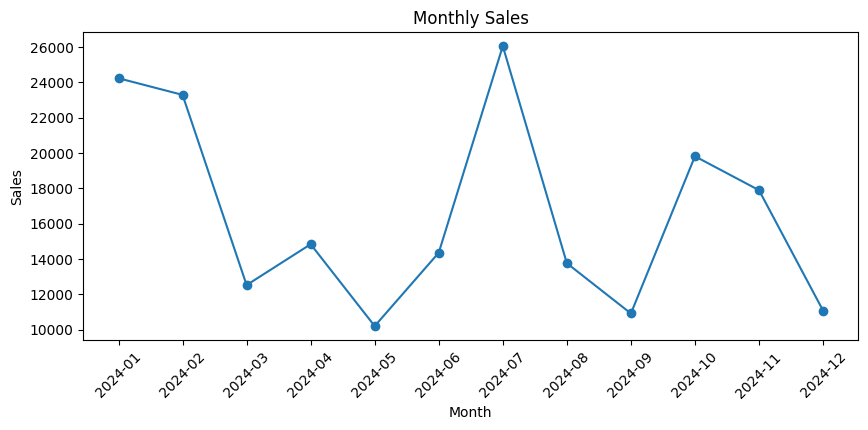

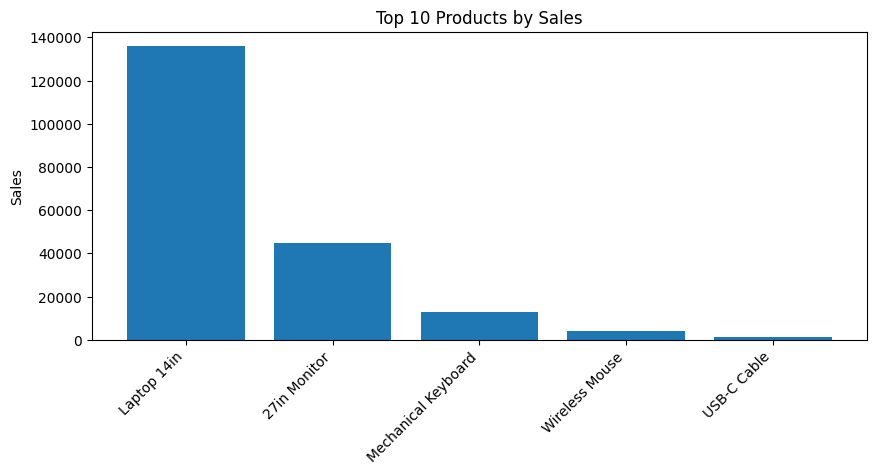

In [6]:
import matplotlib.pyplot as plt

# 1) Monthly Sales line chart
plt.figure(figsize=(10,4))
plt.plot(monthly['YearMonth'], monthly['TotalSales'], marker='o')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

# 2) Top Products bar chart
top10 = top_products.head(10)
plt.figure(figsize=(10,4))
plt.bar(top10['ProductName'], top10['TotalSales'])
plt.title("Top 10 Products by Sales")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Sales")
plt.show()


In [8]:
!pip install xlsxwriter


Defaulting to user installation because normal site-packages is not writeable
  Using cached xlsxwriter-3.2.9-py3-none-any.whl.metadata (2.7 kB)
Using cached xlsxwriter-3.2.9-py3-none-any.whl (175 kB)


In [10]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\Momina Saqlain


plt.savefig("monthly_sales.png")
plt.savefig("top10_products.png")


## 💰 Profitability Analysis
Apart from sales, it is important to analyze which products generate the highest **profits**.


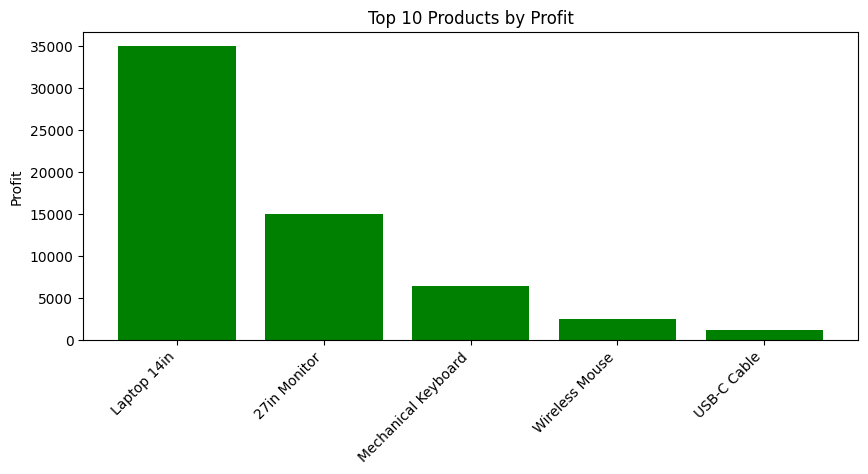

,ProductName,TotalProfit
1,Laptop 14in,34918.06
0,27in Monitor,14937.51
2,Mechanical Keyboard,6422.43
4,Wireless Mouse,2410.46
3,USB-C Cable,1144.81


In [16]:
# Top 10 products by Profit
top_profit = df.groupby('ProductName').agg(
    TotalProfit=('Profit','sum')
).reset_index().sort_values('TotalProfit', ascending=False).head(10)

# Plot chart
plt.figure(figsize=(10,4))
plt.bar(top_profit['ProductName'], top_profit['TotalProfit'], color="green")
plt.title("Top 10 Products by Profit")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Profit")
plt.show()

top_profit


## 🔎 Insights from Profitability Analysis
- High-sales products are not always the most profitable.  
- Some mid-range products give higher margins.  
- Business should **focus on products that are both high-selling and high-profit**.  
- Example: Accessories (like Wireless Mouse) may sell in large numbers but profit margins are low, while items like Laptop 14in give higher profits.  


## ✅ Recommendations
Based on the sales and profitability analysis, the following actions are suggested:

- Run promotional campaigns during low-sales months to boost revenue.  
- Increase stock levels for **top 5 best-selling products** to avoid shortages.  
- Focus marketing efforts on **high-profit products** to maximize margins.  
- Consider **bundle offers** (e.g., Laptop + Accessories) to increase average order value.  
- Launch **customer loyalty programs** for frequent buyers to improve retention.  


## 🎯 Conclusion
The Sales Data Analysis highlights the following:

- Clear **monthly trends** in sales (with peaks and low periods).  
- Identification of **top-performing products** that contribute the most to revenue.  
- Insights into **profitability**, showing that not all high-selling products are the most profitable.  

**Final Note:**  
This analysis provides actionable recommendations that can help the store optimize sales strategies, focus on profitable products, and improve overall business growth.  

---
